## A2 test




In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/hualinbai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hualinbai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## preprocess the reviews : 
- lowercase
- tokenize

In [2]:
reviews_data = pd.read_csv('review_data_ordered.csv')

# for i in range(len(reviews_data)):
word_data = [ item.lower() for item in word_tokenize(reviews_data['review-comment'][2]) if item.isalpha()]
# print(word_data)

# clean stop words
clean_tokens = word_data[:]
stop_words = stopwords.words('english')
for token in word_data:
    if token in stop_words:
        clean_tokens.remove(token)
        
# print(clean_tokens)

In [3]:
print(type(reviews_data['positive-negative']))
print((reviews_data['positive-negative'] == 0).astype(int).sum())
print((reviews_data['positive-negative'] == 1).astype(int).sum())
len(reviews_data)

<class 'pandas.core.series.Series'>
166
686


852

In [31]:


# split training and testing datasets, stratify is to keep the scale between positive and negative samples
# x_train, x_test, y_train, y_test = train_test_split(reviews_data['review-comment'],reviews_data['positive-negative'], test_size=0.5,stratify=reviews_data['positive-negative'])


In [32]:
# print("x_train and y_train \n")
# print(f'{x_train[0:5]} , {y_train}')

# print("x_test and y_test \n")
# print(f'{x_test} , {y_test}')

In [2]:
import math
reviews_csv = pd.read_csv('review_data_ordered.csv')
# split training and testing datasets, stratify is to keep the scale between positive and negative samples
num_negative = (reviews_csv['positive-negative'] == 0).astype(int).sum()
num_positive = (reviews_csv['positive-negative'] == 1).astype(int).sum()
training_dataset_negative = reviews_csv.iloc[0:math.ceil(num_negative / 2)]
# print(training_dataset_negative)
testing_dataset_negative = reviews_csv.iloc[math.ceil(num_negative / 2) : num_negative]
# print(testing_dataset_negative)
training_dataset_positive = reviews_csv.iloc[num_negative : num_negative + math.ceil(num_positive / 2)]
testing_dataset_positive = reviews_csv.iloc[num_negative + math.ceil(num_positive / 2) : ]
# print(training_dataset_positive)
# print(testing_dataset_positive)

In [3]:
# extract the data and build the model

# word_data_negative = [ item.lower() for item in word_tokenize(training_dataset_negative['review-comment'][0]) if item.isalpha()]
# print(word_data)
import re
# clean stop words
clean_tokens_negative = []
removed_words = set()
stop_words = stopwords.words('english')
for review_item in training_dataset_negative['review-comment']:
#     regex_review_item = re.sub(r'[\.\'\-\/\+]',' ',review_item)
    regex_review_item = review_item
    word_data = [ word.lower() for word in word_tokenize(regex_review_item) if word.isalpha()]
#     removed_words.update([word.lower() for word in word_tokenize(regex_review_item) if not word.isalpha()])
    clean_tokens = word_data[:]
    for token in word_data:
        if token in stop_words:
            removed_words.add(token)
            clean_tokens.remove(token)
            
    clean_tokens_negative.extend(clean_tokens)
# print(clean_tokens_negative)
print(len(clean_tokens_negative))
print(removed_words)

# clean_positive
clean_tokens_positive = []
removed_words_2 = set()
stop_words = stopwords.words('english')
for review_item in training_dataset_positive['review-comment']:
#     regex_review_item = re.split('\W+',review_item)
    regex_review_item = re.sub(r'[\.\/\-\+]',' ',review_item)
#     print(regex_review_item)
    regex_review_item = review_item
    word_data = [ word.lower() for word in word_tokenize(regex_review_item) if word.isalpha() and len(word) > 1]
#     print(word_data)
#     removed_words_2.update([word.lower() for word in word_tokenize(regex_review_item) if not word.isalpha()])
#     print(removed_words_2)
    clean_tokens = word_data[:]
#     print(clean_tokens)
    for token in word_data:
        
        if token in stop_words:
#             print(token)
            clean_tokens.remove(token)
            removed_words_2.add(token)
#             print(removed_words_2)
    clean_tokens_positive.extend(clean_tokens)
    
print(len(clean_tokens_positive))
print(removed_words_2)

print(stop_words)

# print(clean_tokens_positive)

4133
{'o', 'against', 'should', 'than', 'my', 'through', 'we', 'with', 'its', 'your', 'having', 'off', 'any', 'an', 'most', 'only', 'out', 'him', 'is', 'other', 'herself', 'few', 'am', 'a', 'before', 'them', 'during', 'of', 'too', 'doing', 'are', 'that', 'over', 'who', 'after', 'can', 'not', 'now', 'on', 'why', 'by', 'her', 'being', 'under', 'will', 'been', 'were', 'all', 's', 'again', 'or', 'this', 'have', 'no', 'did', 'our', 'it', 'does', 'themselves', 'more', 'each', 'was', 'at', 'because', 'where', 'some', 'here', 'from', 'he', 'as', 'such', 'own', 'if', 'these', 'be', 'they', 'below', 'which', 'himself', 'what', 'when', 'while', 'until', 'itself', 'there', 'yourselves', 'just', 'i', 'those', 'in', 'yourself', 'you', 'how', 'into', 'both', 'do', 'and', 'their', 'very', 'the', 'but', 'to', 'his', 'me', 'same', 'then', 'has', 'down', 'had', 'up', 'she', 'so', 'about', 'myself', 'once', 'for', 'between'}
5260
{'should', 'against', 'than', 'my', 'through', 'we', 'with', 'its', 'your', 

In [4]:
# frequency
freq_negative = nltk.FreqDist(clean_tokens_negative)
print(len(freq_negative))
freq_positive = nltk.FreqDist(clean_tokens_positive)
print(len(freq_positive))

# for key, val in freq.items():
#     print(str(key) + ':' + str(val))
dict_freq_negative = {k:v for k,v in freq_negative.items()}
dict_freq_positive = {k:v for k,v in freq_positive.items()}
print(dict_freq_negative)
print(dict_freq_positive)

1545
1618
{'sf': 1, 'humanity': 2, 'sole': 1, 'survivors': 2, 'space': 3, 'stations': 3, 'years': 7, 'earth': 6, 'rendered': 1, 'uninhabitable': 1, 'nuclear': 1, 'war': 5, 'failing': 2, 'criminals': 1, 'juveniles': 1, 'sent': 1, 'prematurely': 1, 'desperately': 4, 'teens': 1, 'handy': 1, 'tv': 5, 'people': 30, 'like': 60, 'look': 4, 'dramatic': 1, 'conflict': 3, 'easily': 2, 'stirred': 1, 'pretence': 1, 'immaturity': 1, 'excessive': 1, 'drama': 3, 'excused': 1, 'mandated': 1, 'seem': 10, 'realistic': 1, 'anyway': 2, 'forest': 2, 'gorgeous': 1, 'startling': 1, 'unexpected': 2, 'elements': 2, 'girls': 2, 'pretty': 12, 'liked': 5, 'concept': 3, 'quite': 3, 'bit': 10, 'bone': 3, 'dumb': 2, 'instance': 1, 'running': 3, 'time': 18, 'closed': 1, 'ecosystem': 1, 'execute': 1, 'misdemeanour': 1, 'flushing': 1, 'alive': 3, 'bodies': 3, 'full': 2, 'water': 2, 'nutrients': 1, 'along': 4, 'airlock': 1, 'air': 1, 'come': 14, 'love': 13, 'show': 70, 'since': 9, 'day': 4, 'last': 29, 'episodes': 25, '

In [5]:
# use set to get all words from positive and negative
total_words_set = set(dict_freq_negative.keys()) | set(dict_freq_positive.keys())
# print(total_words_set)
print(len(total_words_set))


2471


In [6]:
import numpy as np
# create a numpy arrary with the length of the total_words_set

# set initial value is 0
row_size = len(total_words_set) # row size of default_total_words_dict
default_total_words_dict = dict.fromkeys(list(total_words_set),0)
print(len(default_total_words_dict))

# update the dictionary's value
dict_freq_positive_updated = {**default_total_words_dict, **dict_freq_positive}
dict_freq_negative_updated = {**default_total_words_dict, **dict_freq_negative}

print(len(dict_freq_positive_updated))
print(len(dict_freq_negative_updated))
# print(dict_freq_positive_updated)
# print(dict_freq_negative_updated)
# calculate conditinal probability of negative and positive
size_vocabulary = len(default_total_words_dict) * 1 # add 1 smoothing
total_nb_words_positive = sum(dict_freq_positive_updated.values()) + size_vocabulary
# print(f'size_vocabulary : {size_vocabulary}, total_nb_words_positive : {total_nb_words_positive}')
dict_p_wi_positive = {k : np.round((v+1)/total_nb_words_positive,6) for k, v in dict_freq_positive_updated.items()}
# print(f'dict_p_wi_positive \n {dict_p_wi_positive.items()}')
total_nb_words_negative = sum(dict_freq_negative_updated.values()) + size_vocabulary
dict_p_wi_negative = {k : np.round((v+1)/total_nb_words_negative,6) for k, v in dict_freq_negative_updated.items()}
# print(f'dict_p_wi_negative \n {dict_p_wi_negative.items()}')
print(f'size_vocabulary : {size_vocabulary}, total_nb_words_positive : {total_nb_words_positive}, total_nb_words_negative : {total_nb_words_negative}')


# compare the dicts have same keys
print(len(dict_freq_positive_updated.keys() - dict_freq_negative_updated.keys()))
# print(len(total_words_freq_positive_dict))

# create dataframe of model
columns_name = ['word-name','freq-positive','freq-negative','p-wi-positive','p-wi-negative']

df_freq_positive = pd.DataFrame(dict_freq_positive_updated.items(),columns=[columns_name[0],columns_name[1]])
df_freq_negative = pd.DataFrame(dict_freq_negative_updated.items(),columns=[columns_name[0],columns_name[2]])
df_p_wi_positive = pd.DataFrame(dict_p_wi_positive.items(),columns=[columns_name[0],columns_name[3]])
df_p_wi_negative = pd.DataFrame(dict_p_wi_negative.items(),columns=[columns_name[0],columns_name[4]])

# concate DataFrames
df_all = [df_freq_positive,df_freq_negative,df_p_wi_positive,df_p_wi_negative]
result_model = df_all[0].merge(df_all[1].merge(df_all[2]).merge(df_all[3]))
# print(result_model)
# print(result_model.info)
for index, row in result_model.iterrows():
    print(f'No.{index+1} {row["word-name"]}') 
    print(f'{row["freq-positive"]}, {row["p-wi-positive"]}, {row["freq-negative"]}, {row["p-wi-negative"]}')
#     print(f'{row["word-name"]}')
    
    

2471
2471
2471
size_vocabulary : 2471, total_nb_words_positive : 7731, total_nb_words_negative : 6604
0
No.1 politically
1, 0.000259, 0, 0.000151
No.2 create
1, 0.000259, 0, 0.000151
No.3 hopeful
0, 0.000129, 2, 0.000454
No.4 straight
0, 0.000129, 1, 0.000303
No.5 trouble
0, 0.000129, 2, 0.000454
No.6 seconds
0, 0.000129, 3, 0.000606
No.7 giving
6, 0.000905, 2, 0.000454
No.8 treading
1, 0.000259, 0, 0.000151
No.9 explains
2, 0.000388, 0, 0.000151
No.10 distant
1, 0.000259, 0, 0.000151
No.11 massacre
0, 0.000129, 2, 0.000454
No.12 fascinating
0, 0.000129, 1, 0.000303
No.13 somewhat
1, 0.000259, 3, 0.000606
No.14 purposely
1, 0.000259, 0, 0.000151
No.15 camera
1, 0.000259, 0, 0.000151
No.16 hope
26, 0.003492, 10, 0.001666
No.17 think
9, 0.001293, 12, 0.001969
No.18 patch
0, 0.000129, 1, 0.000303
No.19 presented
0, 0.000129, 2, 0.000454
No.20 board
0, 0.000129, 1, 0.000303
No.21 imdb
1, 0.000259, 0, 0.000151
No.22 rating
7, 0.001035, 0, 0.000151
No.23 primes
2, 0.000388, 5, 0.000909
No.24

No.718 holding
1, 0.000259, 0, 0.000151
No.719 meanwwhile
1, 0.000259, 0, 0.000151
No.720 deep
2, 0.000388, 2, 0.000454
No.721 worry
2, 0.000388, 0, 0.000151
No.722 milked
0, 0.000129, 1, 0.000303
No.723 totally
2, 0.000388, 2, 0.000454
No.724 gaps
1, 0.000259, 1, 0.000303
No.725 stayed
0, 0.000129, 1, 0.000303
No.726 ate
0, 0.000129, 1, 0.000303
No.727 brainwashed
0, 0.000129, 1, 0.000303
No.728 flawlessly
1, 0.000259, 0, 0.000151
No.729 surprised
0, 0.000129, 2, 0.000454
No.730 expectation
2, 0.000388, 0, 0.000151
No.731 society
1, 0.000259, 0, 0.000151
No.732 family
0, 0.000129, 1, 0.000303
No.733 matter
0, 0.000129, 1, 0.000303
No.734 focuses
1, 0.000259, 1, 0.000303
No.735 knew
0, 0.000129, 2, 0.000454
No.736 omg
2, 0.000388, 0, 0.000151
No.737 realizing
0, 0.000129, 1, 0.000303
No.738 opening
1, 0.000259, 1, 0.000303
No.739 shown
1, 0.000259, 0, 0.000151
No.740 got
17, 0.002328, 15, 0.002423
No.741 butt
1, 0.000259, 1, 0.000303
No.742 multiple
1, 0.000259, 1, 0.000303
No.743 thin

1, 0.000259, 0, 0.000151
No.1218 shred
0, 0.000129, 1, 0.000303
No.1219 later
1, 0.000259, 0, 0.000151
No.1220 anyone
6, 0.000905, 2, 0.000454
No.1221 alive
1, 0.000259, 3, 0.000606
No.1222 sell
0, 0.000129, 2, 0.000454
No.1223 poor
3, 0.000517, 1, 0.000303
No.1224 bonding
1, 0.000259, 0, 0.000151
No.1225 establishing
1, 0.000259, 0, 0.000151
No.1226 tragic
1, 0.000259, 0, 0.000151
No.1227 cji
1, 0.000259, 0, 0.000151
No.1228 ground
6, 0.000905, 1, 0.000303
No.1229 front
1, 0.000259, 2, 0.000454
No.1230 solving
0, 0.000129, 1, 0.000303
No.1231 react
2, 0.000388, 0, 0.000151
No.1232 collapsing
1, 0.000259, 0, 0.000151
No.1233 hidden
0, 0.000129, 1, 0.000303
No.1234 lost
2, 0.000388, 3, 0.000606
No.1235 reference
1, 0.000259, 0, 0.000151
No.1236 loss
1, 0.000259, 2, 0.000454
No.1237 different
4, 0.000647, 7, 0.001211
No.1238 finishing
0, 0.000129, 1, 0.000303
No.1239 blood
1, 0.000259, 5, 0.000909
No.1240 touching
1, 0.000259, 0, 0.000151
No.1241 explored
2, 0.000388, 0, 0.000151
No.1242

No.1756 political
1, 0.000259, 1, 0.000303
No.1757 lived
1, 0.000259, 0, 0.000151
No.1758 bet
3, 0.000517, 1, 0.000303
No.1759 large
1, 0.000259, 0, 0.000151
No.1760 full
8, 0.001164, 2, 0.000454
No.1761 monitor
0, 0.000129, 1, 0.000303
No.1762 neck
0, 0.000129, 1, 0.000303
No.1763 single
0, 0.000129, 1, 0.000303
No.1764 bee
1, 0.000259, 0, 0.000151
No.1765 delivering
1, 0.000259, 0, 0.000151
No.1766 existence
1, 0.000259, 0, 0.000151
No.1767 lola
0, 0.000129, 1, 0.000303
No.1768 civilized
0, 0.000129, 3, 0.000606
No.1769 intertwined
1, 0.000259, 0, 0.000151
No.1770 feeble
0, 0.000129, 1, 0.000303
No.1771 seat
4, 0.000647, 0, 0.000151
No.1772 much
19, 0.002587, 14, 0.002271
No.1773 trash
0, 0.000129, 1, 0.000303
No.1774 nice
6, 0.000905, 1, 0.000303
No.1775 justify
0, 0.000129, 1, 0.000303
No.1776 missions
1, 0.000259, 0, 0.000151
No.1777 expect
5, 0.000776, 2, 0.000454
No.1778 lots
4, 0.000647, 3, 0.000606
No.1779 keep
15, 0.00207, 5, 0.000909
No.1780 faux
0, 0.000129, 1, 0.000303
No.

No.2217 ignore
1, 0.000259, 0, 0.000151
No.2218 history
1, 0.000259, 1, 0.000303
No.2219 honor
0, 0.000129, 1, 0.000303
No.2220 despite
2, 0.000388, 1, 0.000303
No.2221 holy
1, 0.000259, 0, 0.000151
No.2222 whenever
0, 0.000129, 1, 0.000303
No.2223 instinctive
1, 0.000259, 0, 0.000151
No.2224 urgh
0, 0.000129, 1, 0.000303
No.2225 find
7, 0.001035, 3, 0.000606
No.2226 introduction
2, 0.000388, 1, 0.000303
No.2227 erase
0, 0.000129, 1, 0.000303
No.2228 wasted
2, 0.000388, 0, 0.000151
No.2229 came
2, 0.000388, 5, 0.000909
No.2230 bored
2, 0.000388, 4, 0.000757
No.2231 news
1, 0.000259, 0, 0.000151
No.2232 slomo
1, 0.000259, 0, 0.000151
No.2233 help
2, 0.000388, 4, 0.000757
No.2234 interesting
38, 0.005045, 9, 0.001514
No.2235 dumbest
0, 0.000129, 1, 0.000303
No.2236 serial
0, 0.000129, 1, 0.000303
No.2237 misdemeanour
0, 0.000129, 1, 0.000303
No.2238 lucky
1, 0.000259, 0, 0.000151
No.2239 talk
2, 0.000388, 2, 0.000454
No.2240 sniper
1, 0.000259, 0, 0.000151
No.2241 retaking
0, 0.000129, 1

In [25]:
result_model

,word-name,freq-positive,freq-negative,p-wi-positive,p-wi-negative
0,politically,1,0,0.000259,0.000151
1,create,1,0,0.000259,0.000151
2,hopeful,0,2,0.000129,0.000454
3,straight,0,1,0.000129,0.000303
4,trouble,0,2,0.000129,0.000454
...,...,...,...,...,...
2466,cloning,0,1,0.000129,0.000303
2467,infinite,0,1,0.000129,0.000303
2468,rubbish,0,1,0.000129,0.000303
2469,irritating,0,1,0.000129,0.000303


In [7]:
def process_testing_text(dataset,nb_model):
    '''
    This method is to process testing text including extract data, lowercase and tokenize the words.
    :param: testing dataset : DataFrame
    :return: list_sum_result positive and negative
    '''
   
    list_sum_result_positive = []
    list_sum_result_negative = []
    # process testing text including extract data, lowercase and tokenize the words.
    # use stopwords of nltk
    stop_words = stopwords.words('english')
    for index, row in dataset.iterrows():
        # use regex to replace some pattern
        row["review-comment"] = re.sub(r'[\.\/\-\+]',' ',row["review-comment"])
        # lowercase word and check if it is alpha
        word_data = [ word.lower() for word in word_tokenize(row["review-comment"]) if word.isalpha() and len(word) > 1]
        clean_tokens = word_data[:]
        for token in word_data:
            if token in stop_words:
                clean_tokens.remove(token)
        # print(clean_tokens)
       
        # calculate sum(p(wi|positive)) and sum(p(wi|negative)) using log10
        sum_result_positive = 0
        sum_result_negative = 0
        for word_name in clean_tokens:
            # check the word is in the nb_model
            if len(nb_model.loc[nb_model["word-name"] == word_name]) == 1:
                sum_result_positive += math.log10(nb_model.loc[nb_model["word-name"] == word_name]["p-wi-positive"])
                sum_result_negative += math.log10(nb_model.loc[nb_model["word-name"] == word_name]["p-wi-negative"])
        # print(f'{sum_result_positive}')
        list_sum_result_positive.append(np.round(sum_result_positive,2))
        list_sum_result_negative.append(np.round(sum_result_negative,2))

    return list_sum_result_positive, list_sum_result_negative

In [8]:


# testing dataset
def naive_bayes_classifier(a_nb_model, testing_dataset_p, testing_dataset_n,num_train_positive, num_train_negative):
    '''
    This method is to use naive bayes classifier to classify the testing dataset.
    :param: a_nb_model, testing_dataset_p, testing_dataset_n,num_train_positive, num_train_negative
    :return: df_test_result : DataFrame
    '''
    # deepcopy nb_model
    nb_model = copy.deepcopy(a_nb_model)
    # test dataframe to store the test info
    list_review_title = []
    list_p_ri_positive = []
    list_p_ri_negative = []
    list_my_result = []
    list_correct_result = []
    list_prediction = []
    # calculate p(positive) and p(negative)
    p_positive = np.round(math.log10(num_train_positive/(num_train_positive+num_train_negative)),2)
    p_negative = np.round(math.log10(num_train_negative/(num_train_positive+num_train_negative)),2)
    print(f'[news] p_positive is {p_positive}, p_negative is {p_negative}')
    # first, process the reviews of testing datasets
    print("[news] processing the reviews of testing datasets")
    # positive testing dataset
    sum_testing_positive_list_p, sum_testing_negative_list_p = process_testing_text(testing_dataset_p,nb_model)
    list_p_ri_positive.extend(sum_testing_positive_list_p)
    list_p_ri_negative.extend(sum_testing_negative_list_p)
    # store correct result
    for _ in range(len(testing_dataset_p)):
        list_correct_result.append('positive')
    
    # negative testing dataset
    sum_testing_positive_list_n, sum_testing_negative_list_n = process_testing_text(testing_dataset_n,nb_model)
    list_p_ri_positive.extend(sum_testing_positive_list_n)
    list_p_ri_negative.extend(sum_testing_negative_list_n)
    # calculate p(ri|positive), p(ri|negative)
    list_p_ri_positive = np.array(list_p_ri_positive) + p_positive
    list_p_ri_negative = np.array(list_p_ri_negative) + p_negative
    # store correct result
    for _ in range(len(testing_dataset_n)):
        list_correct_result.append('negative')
    
    # calculate my result
    list_result_temp = list_p_ri_positive - list_p_ri_negative
    for item in list_result_temp:
        if item > 0:
            list_my_result.append('positive')
        else:
            list_my_result.append('negative')
    # calculate prediction is right or wrong (based on comparing your result with correctresult)
    for i, item in enumerate(list_correct_result):
        if list_my_result[i] == item:
            list_prediction.append('right')
        else:
            list_prediction.append('wrong')
            
    # store review title
    for index, title in testing_dataset_p.iterrows():
        list_review_title.append(title["review-title"])
#         print(title)
    for index, title in testing_dataset_n.iterrows():
        list_review_title.append(title["review-title"])
    
    
    # save the info in DataFrame
    df_test_result = pd.DataFrame({
         'review-title':list_review_title ,
         'p-ri-positive':list_p_ri_positive,
         'p-ri-negative':list_p_ri_negative,
         'my-result':list_my_result,
         'correct-result':list_correct_result,
         'prediction':list_prediction})
    # print(df_test_result.info)
    print("[news] finished Naive Bayes Classifier!")
    return df_test_result
    
    

In [10]:
import copy
df_test_result = naive_bayes_classifier(result_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))

# the prediction correctness
df_freq_group = df_test_result['prediction'].value_counts()
freq_correct_prediction = df_freq_group[df_freq_group.index == 'right']
prediction_correctness = np.round(freq_correct_prediction / len(df_test_result),4)
print(f'prediction correctness is : {prediction_correctness[0]}')

[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
prediction correctness is : 0.6981


In [11]:
df_test_result.tail()


,review-title,p-ri-positive,p-ri-negative,my-result,correct-result,prediction
313,"Entertaining, but can't take it seriously\n",-180.21,-179.27,negative,negative,right
314,Fun and breezy\n,-291.63,-289.21,negative,negative,right
315,99 problems and the 100 won't be one\n,-157.96,-153.32,negative,negative,right
316,"The Ark is interesting, The Earth is not.\n",-28.79,-29.48,positive,negative,wrong
317,"Good plot, bad execution\n",-222.87,-221.15,negative,negative,right


In [13]:
import copy
def rebuild_model_by_frequency(a_df_model, cut_frequency = 0, cut_top = 0):
    '''
    The method is to rebuild model including re-calculate the frequency of each word in the dataset, and conditional probability 
    of P(wi|positive) or P(wi|negative).
    :param: a_df_model
    :param: cut frequency number
    :param: cut top num for most frequency words
    :return: df_infrequent_model : pandas.dataframe -- column: word's name, rows: |freq in positive | freq in negative | P(wi|positive)| P(wi|negative)|
    :return: new_size_vocabulary : int
    '''
    # TODO: Task 2.1 Infrequent word filtering
    df_infrequent_model = copy.deepcopy(a_df_model)
    # remove vocabulary words according the cut_frequency
    # replace 0 for all words which frequency = cut_frequency such as 1,10,20
    if cut_frequency == 0: pass
    elif cut_frequency == 1:
        df_infrequent_model.loc[df_infrequent_model["freq-positive"] == cut_frequency] = 0
        df_infrequent_model.loc[df_infrequent_model["freq-negative"] == cut_frequency] = 0  
    else:
        df_infrequent_model.loc[df_infrequent_model["freq-positive"] <= cut_frequency] = 0
        df_infrequent_model.loc[df_infrequent_model["freq-negative"] <= cut_frequency] = 0 
    # remove word from the vocabulary
    df_infrequent_model = df_infrequent_model.drop(df_infrequent_model[(df_infrequent_model["freq-positive"] == 0) & (df_infrequent_model["freq-negative"] == 0)].index)
    # reorder the df_model for cut top frequency
    df_infrequent_model = df_infrequent_model.sort_values(by=["freq-positive","freq-negative"],ascending=False)
    if cut_top == 0: pass
    else:
        num_remove_rows = math.ceil(cut_top*len(df_infrequent_model))
        # remove top frequency words
        df_infrequent_model = df_infrequent_model.drop(df_infrequent_model.head(num_remove_rows).index)
    
    
    # smoothing 1
    smoothing = 1
    # calculate new_size_vocabulary
    new_size_vocabulary = len(df_infrequent_model) * smoothing # add 1 smoothing

    # re-calculate new_total_nb_words_positive and new_total_nb_words_positive
    new_total_nb_words_positive = df_infrequent_model["freq-positive"].sum() + new_size_vocabulary
    new_total_nb_words_negative = df_infrequent_model["freq-negative"].sum() + new_size_vocabulary
    print(f'\n[Rebuild Model by Frequency] new_total_nb_words_positive : {new_total_nb_words_positive}, new_total_nb_words_negative : {new_total_nb_words_negative}')

    print(f'[Rebuild Model by Frequency] new_size_vocabulary is : {new_size_vocabulary}')
    # print(df_infrequent_model)

    for i in range(len(df_infrequent_model)):
        # rewrite the p-wi-positive and p-wi-negative
        df_infrequent_model.iloc[i,3] = np.round( (df_infrequent_model.iloc[i,1] + smoothing) / new_total_nb_words_positive,6)
        df_infrequent_model.iloc[i,4] = np.round( (df_infrequent_model.iloc[i,2] + smoothing) / new_total_nb_words_negative,6)

    print("[news] Success rebuild model by frequency!")
    return df_infrequent_model, new_size_vocabulary

def calc_prediction(a_dataframe):
    '''
    The method is to calculate the prediction correctness.
    :param: a dataframe
    :return: prediction_correctness (float)
    '''
    # add the prediction correctness
    df_freq_group = a_dataframe['prediction'].value_counts()
    freq_correct_prediction = df_freq_group[df_freq_group.index == 'right']
    prediction_correctness = np.round(np.round(freq_correct_prediction / len(a_dataframe),4)*100,2)
    print(f'[prediction correctness] is {prediction_correctness[0]}')
    return prediction_correctness[0]

In [14]:


# prediction_list
prediction_list = []
words_amount_list = []
# get original one
df_test_result = naive_bayes_classifier(result_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))
prediction_list.append(calc_prediction(df_test_result))
words_amount_list.append(len(result_model))
# Task 2.1
infrequency = [1,10,20]
print("[Task 2.1] Infrequent Word Filtering")
# deepcopy original result model
df_infrequent_model = copy.deepcopy(result_model)
for item in infrequency:
    print(f'\n[news] cut frequency is : {item}')
    df_infrequent_model, size_volcabulary = rebuild_model_by_frequency(df_infrequent_model,item,0)
    # print(df_infrequent_model.info)
    df_test_result = naive_bayes_classifier(df_infrequent_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))
    prediction_list.append(calc_prediction(df_test_result))
    words_amount_list.append(size_volcabulary)
print("\n[news] removing top frequency words...")   
top_frequency = [0.05,0.1,0.2]
for item in top_frequency:
    print(f'\n[news] cut top is : {item*100}%')
    df_infrequent_model,size_volcabulary = rebuild_model_by_frequency(df_infrequent_model,0,item)
#     print(df_infrequent_model.info)
    df_test_result = naive_bayes_classifier(df_infrequent_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))
    prediction_list.append(calc_prediction(df_test_result))
    words_amount_list.append(size_volcabulary)

print(f'\n[Finished Task 2.1] prediction correctness is : {prediction_list}')
print(f'\t\t\t\t words_amount is : {words_amount_list}')




[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 69.81
[Task 2.1] Infrequent Word Filtering

[news] cut frequency is : 1

[Rebuild Model by Frequency] new_total_nb_words_positive : 4559, new_total_nb_words_negative : 3594
[Rebuild Model by Frequency] new_size_vocabulary is : 715
[news] Success rebuild model by frequency!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 68.87

[news] cut frequency is : 10

[Rebuild Model by Frequency] new_total_nb_words_positive : 1435, new_total_nb_words_negative : 1092
[Rebuild Model by Frequency] new_size_vocabulary is : 41
[news] Success rebuild model by frequency!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correct

In [11]:
df_test_result.tail()

,review-title,p-ri-positive,p-ri-negative,my-result,correct-result,prediction
313,"Entertaining, but can't take it seriously\n",-5.08,-4.55,negative,negative,right
314,Fun and breezy\n,-4.07,-4.80,positive,negative,wrong
315,99 problems and the 100 won't be one\n,-5.65,-5.60,negative,negative,right
316,"The Ark is interesting, The Earth is not.\n",-2.22,-2.42,positive,negative,wrong
317,"Good plot, bad execution\n",-6.06,-5.35,negative,negative,right


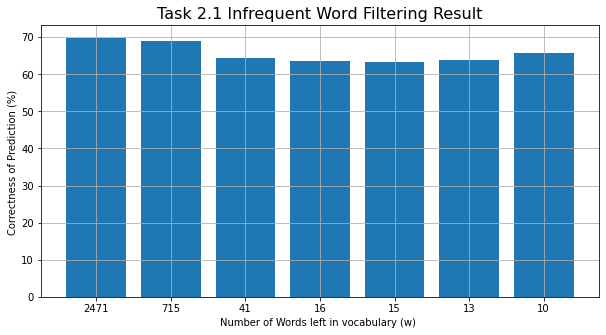

In [22]:

import matplotlib.pyplot as plt

# draw graph
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(range(len(words_amount_list)), words_amount_list)
# set title and axis lables
ax.set_xlabel("Number of Words left in vocabulary (w) ")
ax.set_ylabel("Correctness of Prediction (%) ")
ax.set_title("Task 2.1 Infrequent Word Filtering Result", fontsize=16, color='black', verticalalignment="baseline")

plt.bar(range(len(prediction_list)), prediction_list)
ax.grid(True)
plt.show()


### Task 2.2

In [24]:
def rebuild_model_by_smoothing(a_df_model, current_smoothing):
    '''
    The method is to rebuild model by smoothing including re-calculate the frequency of each word in the dataset, and conditional probability 
    of P(wi|positive) or P(wi|negative).
    :param: a_df_model
    :param: current_smoothing
    :return: df_smoothing_model : pandas.dataframe -- column: word's name, rows: |freq in positive | freq in negative | P(wi|positive)| P(wi|negative)|
    '''
    # TODO: Task 2.2 Word Smoothing Filtering
    df_smoothing_model = copy.deepcopy(a_df_model)
    # set smoothing
    smoothing = current_smoothing
    
    # calculate new_size_vocabulary
    new_size_vocabulary = len(df_smoothing_model) * smoothing # add smoothing

    # re-calculate new_total_nb_words_positive and new_total_nb_words_positive
    new_total_nb_words_positive = df_smoothing_model["freq-positive"].sum() + new_size_vocabulary
    new_total_nb_words_negative = df_smoothing_model["freq-negative"].sum() + new_size_vocabulary
    print(f'[Rebuild Model by Smoothing] Current Smoothing is : {smoothing}')
    print(f'[Rebuild Model by Smoothing] new_total_nb_words_positive : {new_total_nb_words_positive}, new_total_nb_words_negative : {new_total_nb_words_negative}')
    # print(df_infrequent_model)

    for i in range(len(df_smoothing_model)):
        # rewrite the p-wi-positive and p-wi-negative
        df_smoothing_model.iloc[i,3] = np.round( (df_smoothing_model.iloc[i,1] + smoothing) / new_total_nb_words_positive,6)
        df_smoothing_model.iloc[i,4] = np.round( (df_smoothing_model.iloc[i,2] + smoothing) / new_total_nb_words_negative,6)

    print("[news] Success rebuild model by smoothing!\n")
    return df_smoothing_model

In [28]:
# Task 2.2 Word smoothing filter
# smoothing is from 1.2 to 2 instead of 1 to 2, since default smoothing=1
print("[Task 2.2] Word smoothing filter")
prediction_list = []
smoothing_values = [1,1.2,1.4,1.6,1.8,2]
for s_i in smoothing_values:
    if s_i == 1:
        pass
    else:
        df_smoothing_model = rebuild_model_by_smoothing(result_model,s_i)
        # print(df_infrequent_model.info)
        df_test_result = naive_bayes_classifier(df_smoothing_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))
        prediction_list.append(calc_prediction(df_test_result))
 
  

[Task 2.2] Word smoothing filter
[Rebuild Model by Smoothing] Current Smoothing is : 1.2
[Rebuild Model by Smoothing] new_total_nb_words_positive : 8225.2, new_total_nb_words_negative : 7098.2
[news] Success rebuild model by smoothing!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 69.81
[Rebuild Model by Smoothing] Current Smoothing is : 1.4
[Rebuild Model by Smoothing] new_total_nb_words_positive : 8719.4, new_total_nb_words_negative : 7592.4
[news] Success rebuild model by smoothing!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 69.81
[Rebuild Model by Smoothing] Current Smoothing is : 1.6
[Rebuild Model by Smoothing] new_total_nb_words_positive : 9213.6, new_total_nb_words_negative : 8086.6
[news] Success rebuild model by smoothing!
[news] p_posit

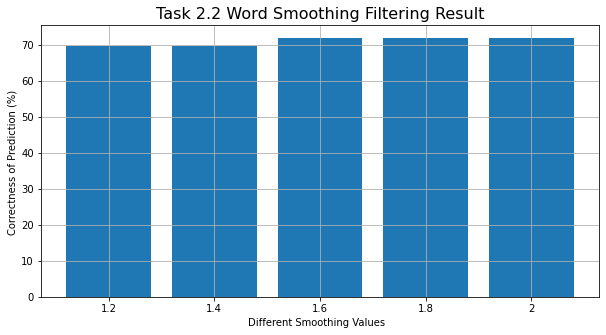

In [29]:
# draw graph
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(range(len(smoothing_values)), smoothing_values)
# set title and axis lables
ax.set_xlabel("Different Smoothing Values  ")
ax.set_ylabel("Correctness of Prediction (%) ")
ax.set_title("Task 2.2 Word Smoothing Filtering Result", fontsize=16, color='black', verticalalignment="baseline")

plt.bar(range(len(prediction_list)), prediction_list)
ax.grid(True)
plt.show()

## Task 2.3 Word Length Filtering

In [24]:
# result_model[result_model["word-name"].str.len() == 4]
list_1 = result_model[result_model["freq-positive"] == result_model["freq-negative"] ]["word-name"]
list_2 = list_1.tolist()
print(type(list_2))
print(list_2)

<class 'list'>
['honest', 'adults', 'ability', 'moving', 'search', 'surviving', 'enjoy', 'crying', 'close', 'glad', 'man', 'earlier', 'betrayal', 'par', 'throwback', 'shock', 'mins', 'take', 'saving', 'adventure', 'mother', 'flashbacks', 'proves', 'ruining', 'head', 'unexpected', 'department', 'marie', 'unique', 'gaia', 'constantly', 'faces', 'flame', 'fear', 'greatest', 'turned', 'took', 'city', 'promising', 'overcome', 'president', 'mistakes', 'raven', 'clever', 'changes', 'stop', 'logic', 'critique', 'dont', 'gosh', 'true', 'wrong', 'balancing', 'means', 'opened', 'deep', 'totally', 'gaps', 'focuses', 'opening', 'butt', 'multiple', 'meh', 'vague', 'lack', 'stupid', 'heroes', 'divided', 'younger', 'sooo', 'familiar', 'silly', 'otherwise', 'depth', 'direction', 'noticed', 'barely', 'arc', 'trek', 'become', 'half', 'performances', 'quality', 'bro', 'son', 'consequences', 'appearance', 'revenge', 'easily', 'power', 'desperation', 'horizon', 'original', 'food', 'commander', 'guilty', 'pr

In [12]:
def rebuild_model_by_word_length(a_df_model, word_length):
    '''
    The method is to rebuild model by word length including re-calculate the frequency of each word in the dataset, and conditional probability 
    of P(wi|positive) or P(wi|negative).
    :param: a_df_model
    :param: word_length
    :return: df_word_length_model : pandas.dataframe -- column: word's name, rows: |freq in positive | freq in negative | P(wi|positive)| P(wi|negative)|
    :return: new_size_vocabulary : int
    '''
    # TODO: Task 2.3 word length filtering
    df_word_length_model = copy.deepcopy(a_df_model)
    current_word_length = word_length
    # remove vocabulary words according the word length
    if current_word_length == 9:
        df_word_length_model = df_word_length_model.drop(df_word_length_model[(df_word_length_model["word-name"].str.len() >= current_word_length)].index)
    else:
        df_word_length_model = df_word_length_model.drop(df_word_length_model[(df_word_length_model["word-name"].str.len() <= current_word_length)].index)
    
    # smoothing 1
    smoothing = 1
    # calculate new_size_vocabulary
    new_size_vocabulary = len(df_word_length_model) * smoothing # add 1 smoothing

    # re-calculate new_total_nb_words_positive and new_total_nb_words_positive
    new_total_nb_words_positive = df_word_length_model["freq-positive"].sum() + new_size_vocabulary
    new_total_nb_words_negative = df_word_length_model["freq-negative"].sum() + new_size_vocabulary
    print(f'\n[Rebuild Model by Word Length] new_total_nb_words_positive : {new_total_nb_words_positive}, new_total_nb_words_negative : {new_total_nb_words_negative}')
    print(f'[Rebuild Model by Word Length] new_size_vocabulary is : {new_size_vocabulary}')
    # print(df_infrequent_model)

    for i in range(len(df_word_length_model)):
        # rewrite the p-wi-positive and p-wi-negative
        df_word_length_model.iloc[i,3] = np.round( (df_word_length_model.iloc[i,1] + smoothing) / new_total_nb_words_positive,6)
        df_word_length_model.iloc[i,4] = np.round( (df_word_length_model.iloc[i,2] + smoothing) / new_total_nb_words_negative,6)

    print("[news] Success rebuild model by Word Length!")
    return df_word_length_model, new_size_vocabulary

In [16]:
# Task 2.3
# prediction_list_3 = copy.deepcopy(prediction_list)
# words_amount_list_3 = copy.deepcopy(words_amount_list)
prediction_list_3 = []
words_amount_list_3 = []
word_length_values = [2,4,9]
print("[Task 2.3] Word Length Filtering")
# deepcopy original result model
df_word_length_model = copy.deepcopy(result_model)
for length in word_length_values:
    print(f'\n[news] remove word length is : {length}')
    df_word_length_model, size_volcabulary = rebuild_model_by_word_length(df_word_length_model,length)
    # print(df_word_length_model.info)
    df_test_result = naive_bayes_classifier(df_word_length_model,testing_dataset_positive,testing_dataset_negative,math.ceil(num_positive / 2),math.ceil(num_negative / 2))
    prediction_list_3.append(calc_prediction(df_test_result))
    words_amount_list_3.append(size_volcabulary)

print(f'\n[Finished Task 2.3] prediction correctness is : {prediction_list_3}')
print(f'\t\t\t words_amount is : {words_amount_list_3}')

[Task 2.3] Word Length Filtering

[news] remove word length is : 2

[Rebuild Model by Word Length] new_total_nb_words_positive : 7620, new_total_nb_words_negative : 6533
[Rebuild Model by Word Length] new_size_vocabulary is : 2442
[news] Success rebuild model by Word Length!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 70.75

[news] remove word length is : 4

[Rebuild Model by Word Length] new_total_nb_words_positive : 5529, new_total_nb_words_negative : 4687
[Rebuild Model by Word Length] new_size_vocabulary is : 1955
[news] Success rebuild model by Word Length!
[news] p_positive is -0.19, p_negative is -0.46
[news] processing the reviews of testing datasets
[news] finished Naive Bayes Classifier!
[prediction correctness] is 69.18

[news] remove word length is : 9

[Rebuild Model by Word Length] new_total_nb_words_positive : 4388, new_total_nb_words_negative : 3687


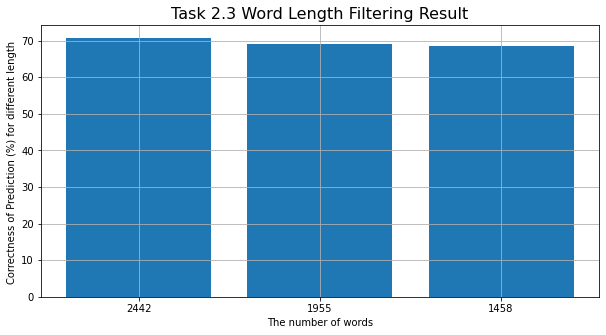

In [19]:
import matplotlib.pyplot as plt
# draw graph
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(range(len(words_amount_list_3)), words_amount_list_3)
# set title and axis lables
ax.set_xlabel("The number of words")
ax.set_ylabel("Correctness of Prediction (%) for different length ")
ax.set_title("Task 2.3 Word Length Filtering Result", fontsize=16, color='black', verticalalignment="baseline")

plt.bar(range(len(prediction_list_3)), prediction_list_3)
ax.grid(True)
plt.show()